# The Monty Hall Problem

## Introduction

The Monty Hall problem is a famous little puzzle from a game show. It goes like this: you are presented with 3 doors. Behind two are goats and behind the third is a car. You are asked to select a door; if you select the door with the car, you win! After selecting, the host then opens one of the remaining two doors, revealing a goat. The host then asks if you would like to switch doors or stick with your original choice. What would you do? Does it matter?

<img src="https://raw.githubusercontent.com/learn-co-curriculum/dsc-monty-hall-problem-lab/master/images/Image_58_MontyHall.png" alt="doors 1, 2, and 3 with two goats and a car">

## Objectives

In this lab you will:

- Use Bayes' theorem along with a simulation to solve the Monty Hall problem

## Run a simulation

This is not a traditional application of Bayes' theorem, so trying to formulate the problem as such is tricky at best. That said, the scenario does capture the motivating conception behind Bayesian statistics: updating our beliefs in the face of additional evidence. With this, you'll employ another frequently used tool Bayesians frequently employ, running simulations. To do this, generate a random integer between one and three to represent the door hiding the car. Then, generate a second integer between one and three representing the player's selection. Then, of those the contestant did not choose, select a door concealing a goat to reveal. Record the results of the simulated game if they changed versus if they did not. Repeat this process a thousand (or more) times. Finally, plot the results of your simulation as a line graph. The x-axis should be the number of simulations, and the y-axis should be the probability of winning. (There should be two lines on the graph, one for switching doors, and the other for keeping the original selection.)

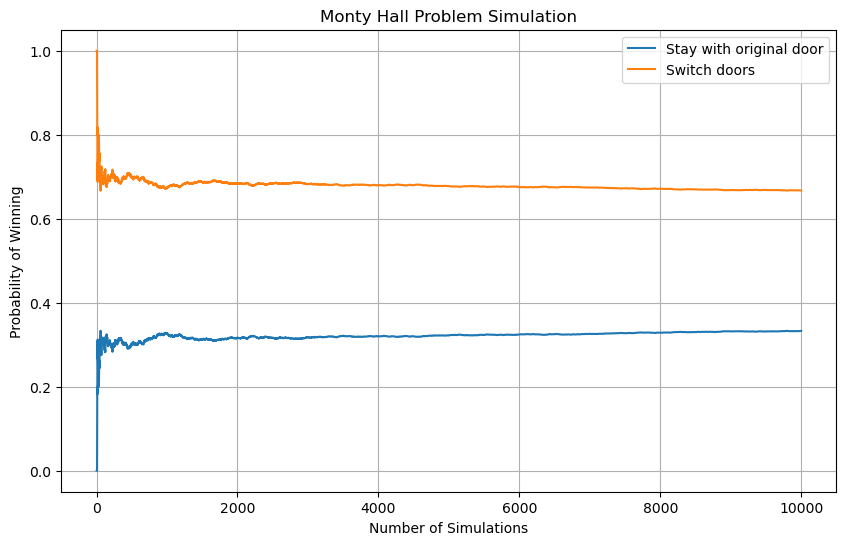

Probability of winning if staying: 0.3330
Probability of winning if switching: 0.6670


In [2]:
import numpy as np
import matplotlib.pyplot as plt

def monty_hall_simulation(num_simulations):
    stay_wins = np.zeros(num_simulations)
    switch_wins = np.zeros(num_simulations)
    
    for i in range(num_simulations):
        # Set up the doors
        doors = np.arange(3)
        
        # Randomly place the car behind one door
        car = np.random.choice(doors)
        
        # Player's initial choice
        initial_choice = np.random.choice(doors)
        
        # Monty opens a door
        available_doors = [door for door in doors if door != car and door != initial_choice]
        monty_opens = np.random.choice(available_doors)
        
        # Determine if staying or switching wins
        stay_wins[i] = (initial_choice == car)
        switch_wins[i] = (car != initial_choice)
    
    # Calculate cumulative probabilities
    stay_prob = np.cumsum(stay_wins) / (np.arange(num_simulations) + 1)
    switch_prob = np.cumsum(switch_wins) / (np.arange(num_simulations) + 1)
    
    return stay_prob, switch_prob

# Run the simulation
num_simulations = 10000
stay_prob, switch_prob = monty_hall_simulation(num_simulations)

# Plot the results
plt.figure(figsize=(10, 6))
plt.plot(range(1, num_simulations + 1), stay_prob, label='Stay with original door')
plt.plot(range(1, num_simulations + 1), switch_prob, label='Switch doors')
plt.xlabel('Number of Simulations')
plt.ylabel('Probability of Winning')
plt.title('Monty Hall Problem Simulation')
plt.legend()
plt.grid(True)
plt.show()

# Print final probabilities
print(f"Probability of winning if staying: {stay_prob[-1]:.4f}")
print(f"Probability of winning if switching: {switch_prob[-1]:.4f}")

## Summary

In this lab, you further investigated the idea of Bayes' theorem and Bayesian statistics in general through the Monty Hall problem. Hopefully, this was an entertaining little experience! 